In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance

In [2]:
# Load dataset
column_names = ["Population","Profit"]  
data = pd.read_csv('ex1data1.txt', names = column_names)

In [5]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values
#or
#x=data['Population'].values.reshape(-1,1)
#y=data['Profit'].values.reshape(-1,1)

In [13]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

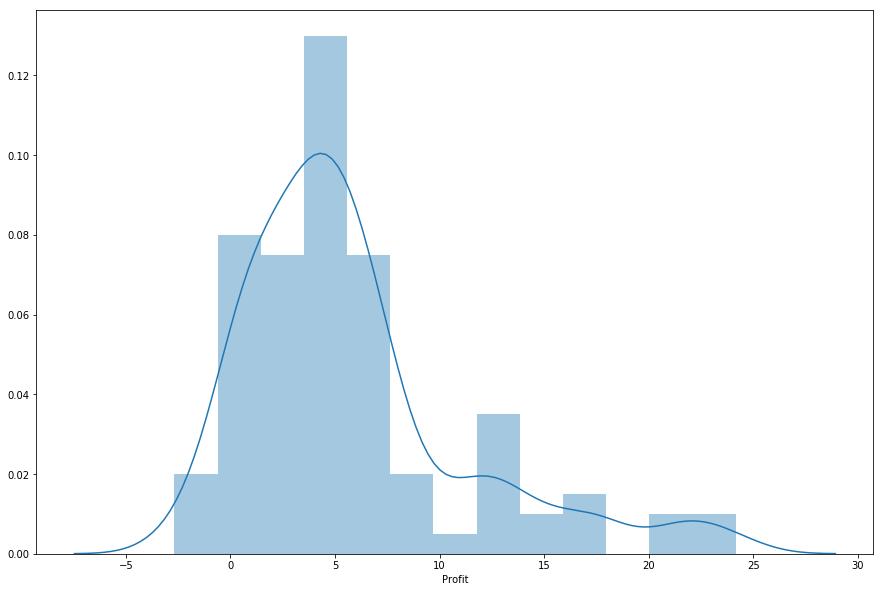

In [54]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Profit'])
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [57]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize=True)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [58]:
#To retrieve the intercept:
print (regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-4.04752723]
[[ 1.21071952]]


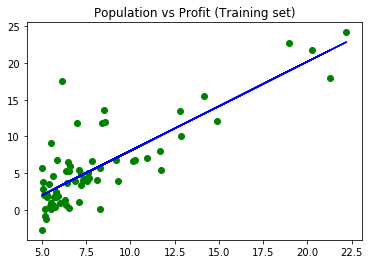

In [59]:
y_pred =regressor.predict(x_train)
plt.scatter(x_train,y_train, color='green')
plt.plot(x_train, y_pred, color='blue')
plt.title('Population vs Profit (Training set)')
plt.show()

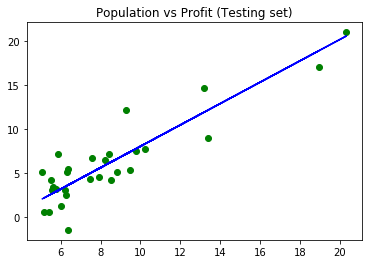

In [47]:
y_pred_test =regressor.predict(x_test)
plt.scatter(x_test,y_test, color='green')
plt.plot(x_test, y_pred_test, color='blue')
plt.title('Population vs Profit (Testing set)')
plt.show()

In [56]:
df=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted': y_pred_test.flatten()})


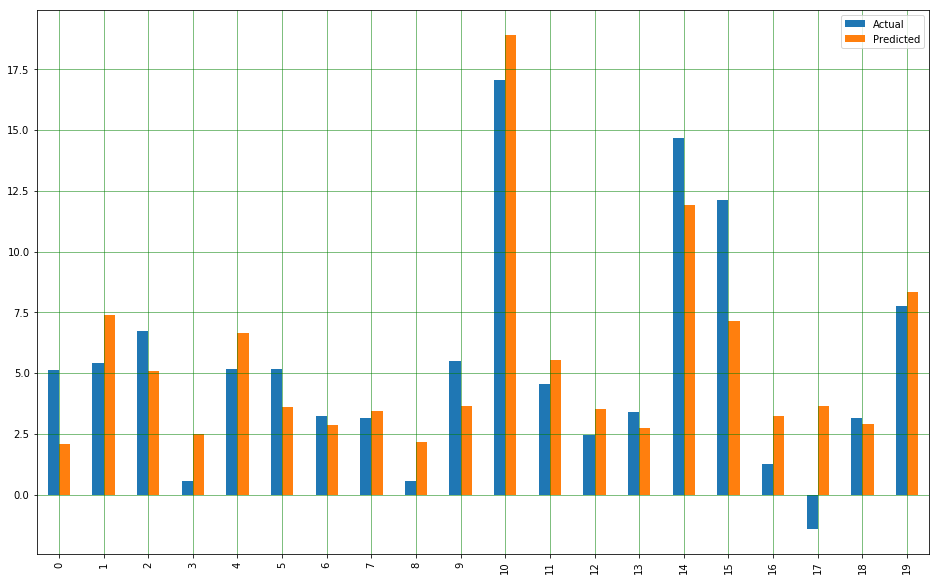

In [55]:
df1=df.head(20)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [60]:
def predict():
    input_ = float(input('Enter the population size(10,000): '))
    print("For a population of {}, the estimated profit is ${}".format(input_, regressor.predict(input_)))

In [61]:
predict()

Enter the population size(10,000): 5000
For a population of 5000.0, the estimated profit is $[[ 6049.550074]]


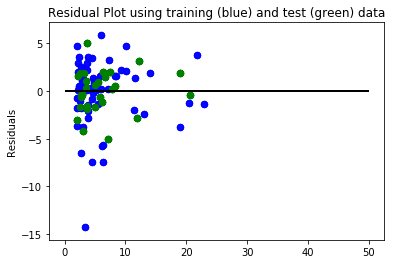

In [44]:
plt.scatter(y_pred, y_pred-y_train, c='b', s=40, alpha=0.5)
plt.scatter(regressor.predict(x_test), regressor.predict(x_test)-y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

In [46]:
#to evaluate the perfomance of the algorithm using the below three evaluation metrics
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error:  2.4154219516
Mean Squared Error:  10.9505665849
Root Mean Squared Error:  3.30916403113


In [49]:
#to evaluate the perfomance of the algorithm using the below three evaluation metrics
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error:  1.68019042018
Mean Squared Error:  4.50998474456
Root Mean Squared Error:  2.1236724664
